# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

This is the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided to us by Udacity, and it will be our job to implement the additional functionality necessary to successfully complete this project. However, in addition to the implementation sections that was required by Udacity I also added extra visualizations from my own study and understanding.

## Data

The dataset used in this project is included as `data/student-data.csv`. This dataset has the following attributes:

- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)
- `passed` : did the student pass the final exam (binary: yes or no)


### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

This is a classification problem because we need to identify students into two classes whether they are likely to pass or fail. Students who are likely to fail to graduat might need early intervention before they fail to graduate.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time

from sklearn.metrics import f1_score

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

#plt.style.use('seaborn-whitegrid')

sns.set(context='notebook', style='whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
rnd_seed=23
np.random.seed(rnd_seed)

In [5]:
# Read student data
student_data = pd.read_csv("data/student-data.csv")
print("Student data read successfully!")

Student data read successfully!


In [6]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [7]:
student_data["passed"].value_counts()

yes    265
no     130
Name: passed, dtype: int64

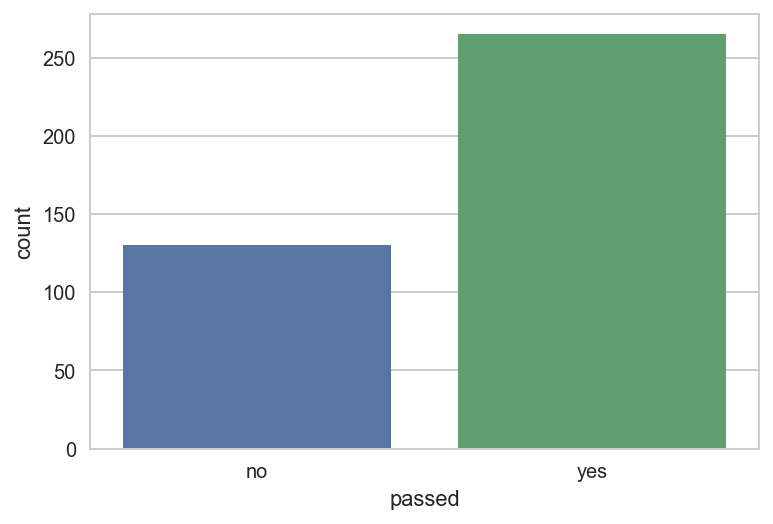

In [8]:
sns.countplot(x='passed', data=student_data);

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [9]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1

# TODO: Calculate passing students
n_passed = len(student_data[student_data["passed"] == "yes"])

# TODO: Calculate failing students
n_failed = len(student_data[student_data["passed"] == "no"])

# TODO: Calculate graduation rate
grad_rate = (n_passed/n_students)*100

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

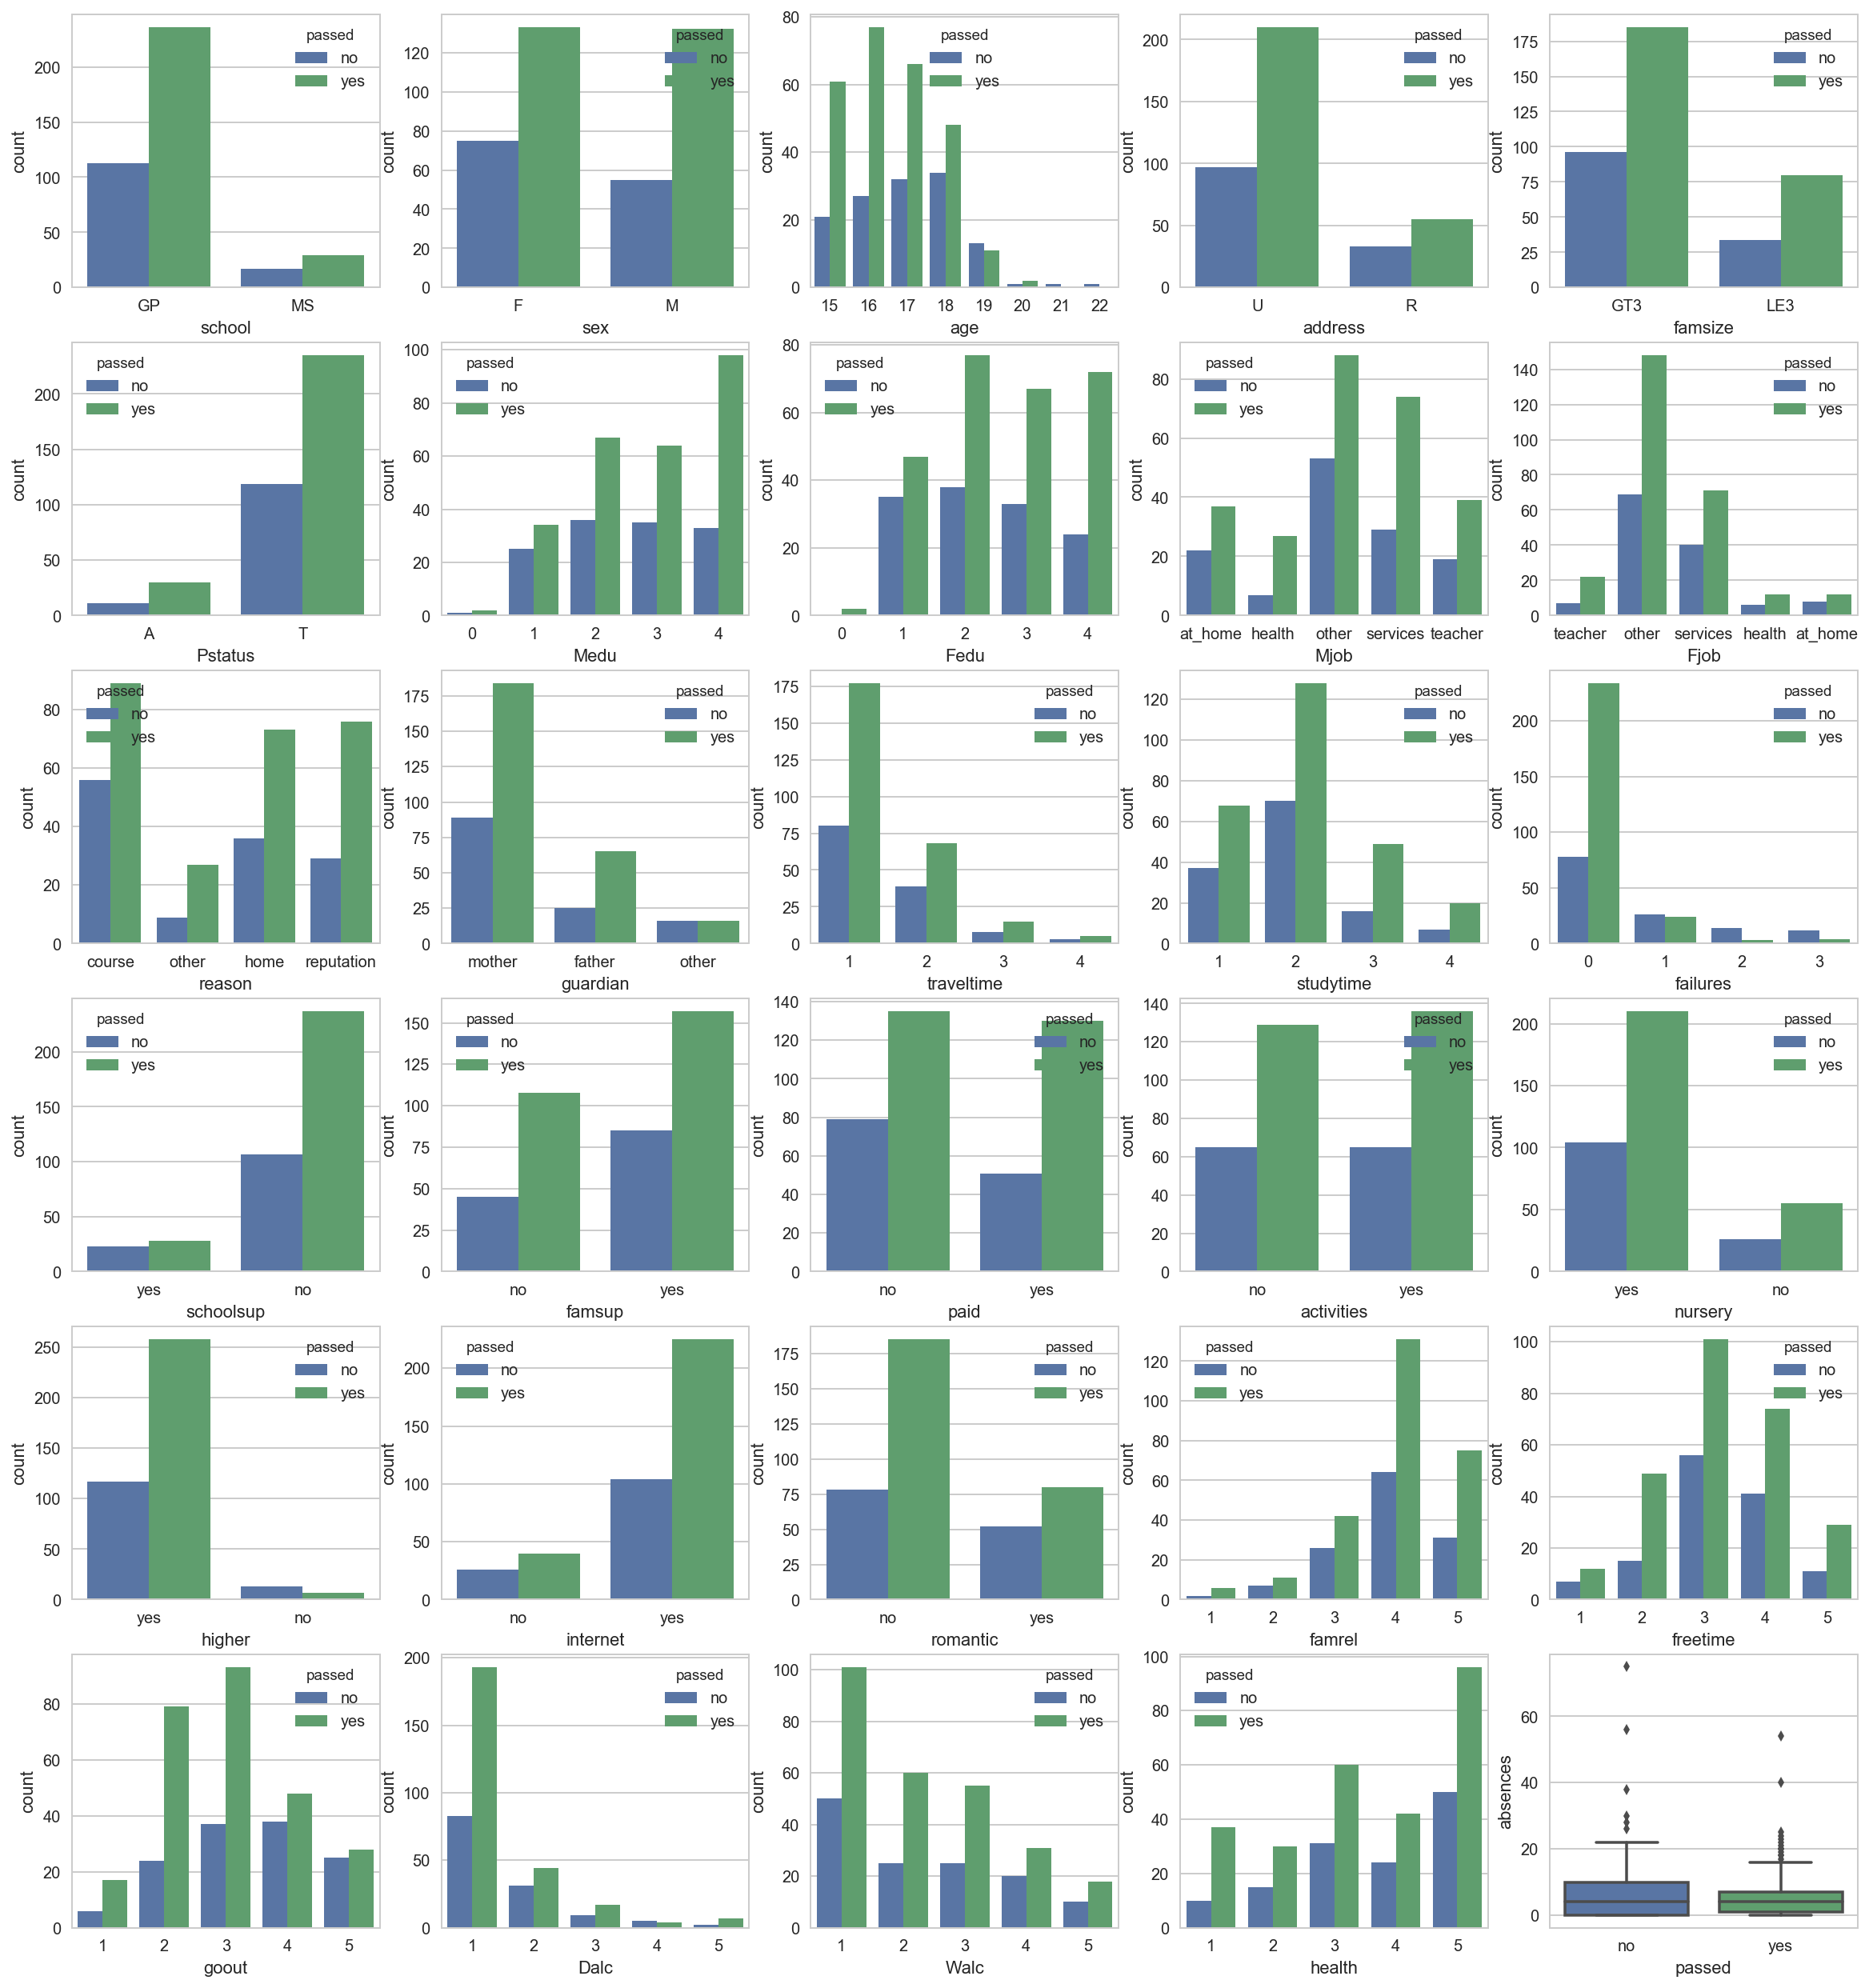

In [10]:
f, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 22))
ax = ax.flatten()

for i, col in enumerate(student_data.columns[:-2]):
    _= sns.countplot(x=col, data=student_data, hue='passed', ax=ax[i])
_= sns.boxplot(x='passed', y='absences', data=student_data, ax=ax[29])

In [11]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

In [12]:
# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


In [13]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

In [14]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
X_all.head()


Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [16]:
X_all = preprocess_features(X_all)

In [17]:
print("Processed feature columns ({} total features):\n".format(len(X_all.columns)))

Processed feature columns (48 total features):



In [18]:
list(X_all.columns)

['school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'age',
 'address_R',
 'address_U',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Medu',
 'Fedu',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [19]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = len(X_all) - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, stratify=y_all, random_state=rnd_seed)

In [20]:
# Show the results of the split
print("Training set has {} samples.".format(len(X_train)))
print("Testing set has {} samples.".format(len(X_test)))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **

The three supervised learning models that I've chosen are :
1. Decision Trees
2. Support Vector Machines
3. K-Nearest Neighbors

**1. Decision Trees** : 

Decision Trees are widely used in several industries including medicine(to classify diseases based on patient's features for example), biomedical research, financial analysis(fraud detection, credit defaulting etc) for both classification and regression problem, astronomy to social media websites for predicting engagement/ad clicks for it's interpretability and versatality.

* Strengths : 
    1. Decision Trees are interpretable and easy to visualize.
    2. Decision Trees can handle both categorical and numerical data
    3. All else being equal, decision trees prefer shorter trees to longer trees by splitting on the "best features"(using information gain or gini impurity index), so it's easy to understand what are the most important features in a dataset


* Weaknesses :

    1. Decision trees grow exponentially with the number of instances and more features
    2. Decision trees overfit very easily as it picks up subtle variances in the data set. However, over-fitting can be minimized by calculating best maximum depth of the tree, minimum number of samples to spilt per node and pruning techniques after creating the tree. Random forest, another model based on decision trees are incredibly popular as it minimizes errors by ensembling over many decision trees.

* Reasons for choosing this model : 
    1. This dataset has many features and a problem like predicting which students need intervention is unlikely to be  linear relationship completely as many details influence a student's learning.
    2. Most features in this data set are binary which is for a decision tree to handle with conditionals and the resulting tree will be easier to interpret and thus determine a course of action to ensure student's learning rate improves.
    

** 2. Support Vector Machine :** 

Support vector machines classify data by finding the maximum margin hyperplane that seperates class labels, it's also a very popular model like the other two, decision trees and K-nearest neighbors and used in industry for classification and regression tasks. Support Vector Machines have been successfully used on high dimensional data such as genetic data(protein structure prediction), music(song genre classification, music retrival), image classification(histogram based), image retrieval etc.

* Strengths  :
    1. As Support Vector Machine tries to find the seperator hyperplane that has the maximum distance between the seperate classes, it's not prone to overfitting.
    2. Linear SVM produces a line as decision boundary, but SVM is also effetive with high dimensional data by using Kernel-trick (mapping the data points to higher dimensional spaces to find the appropriate class labels) 
    
* Weaknesses :
    1. Performance depends on the choice of Kernel. Large data sets may take a lot of time to train.
    2. SVM works really well for datasets that has a clear margin of seperation, but performs poorly on noisy datasets.
    
* Reasons for choosing this model :
    1. As there are many features in this dataset, if this datset has a good margin of seperation SVM would be able to pick it up. 
    2. SVM also works well with high dimensional data with kernel trick, and this dataset has many features.


**3. K Nearest Neighbor ** :

K nearest neighbor is a method of 'instance based learning'/lazy learning as the computation begins when we start predicting, it's also a non-parametric method. K nearest neighbor tries to find similar instances for each query and predicts based on their average/majority voting for classification and regression problem. It can be used in many different cases including content retrieval for photos, videos, text and recommending products etc. It's one of the most popular methods in data mining.

* Strengths :
    1. It does not make any assumptions about the distribution of data. Rather it simply tries to find the most similar k neighbors for each query based on some distance metric/similarity measurement and uses the whole data set for each query.
    2. After choosing the number of neighbors k and the similarity metric d , the algorithm is simple to implement in production.
    3. It's possible to weight the contribution of the neighbors for predicting labels (weighting the nearest neighbors highest and the distant one's lower) for higher accuracy. For datasets that don't follow a general pattern, K nearest neighbor is often a really good choice.
    
* Weaknesses: 
    1. K-nearest neighbor requires the entire dataset to be preserved in the memory. Unlike a parametric model like linear regression where we just have to train once to find the parameters, we can't throw away the data set and this can make the space requirement incredibly high.
    2. It's important to use domain knowledge and grid search techniques to find a good similarity measure and a good k, in practice there can be many variations of distance metrics which can yield different performances.
    3. It's less interpretable than models like decision tree where we can understand which features are the strongest.
    
* Reasons for choosing this model:
    1. Students who are failing may have similar patterns such as similar amount of time invested in recreation over studying, similar number of family members and income, similar geographic region etc which K nearest neighbor can deal with easily.    

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [21]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds.".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below - 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [22]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=rnd_seed)
clf_B = SVC(random_state=rnd_seed)
clf_C = KNeighborsClassifier()


training_sizes  = [100, 200, 300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size

# Decision Tree
for size in training_sizes:
    train_predict(clf_A, X_train[:size], y_train[:size], X_test, y_test)
    
print("\n\n")
    
# Support Vector Machine    
for size in training_sizes:
    train_predict(clf_B, X_train[:size], y_train[:size], X_test, y_test)
    
print("\n\n")
    
# K Neareset Neighbor Classifier
for size in training_sizes:
    train_predict(clf_C, X_train[:size], y_train[:size], X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0040 seconds.
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7460.

Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0040 seconds.
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6333.

Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0000 seconds.
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7132.




Training a SVC using a training set size of 100. . .
Trained model in 0.0040 seconds.
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9014.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7857.

Training a SVC using a training set size

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - DecisionTreeClassifier?**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |0.0012 seconds           |0.0004 seconds.         |1.0000            |0.7194           |
| 200               |0.0017 seconds           |0.0004 seconds          |1.0000            |0.7246           |
| 300               |0.0028 seconds           |0.0004 seconds          |1.0000            |0.7391           |


** Classifer 2 - SVM?**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |0.0017 seconds           |0.0010 seconds          |0.8551            |0.8079           |
| 200               |0.0039 seconds           |0.0016 seconds          |0.8649            |0.8079           |
| 300               |0.0372 seconds           |0.0020 seconds          |0.8724            |0.8054           |


** Classifer 3 - K-Nearest Neighbor **  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |0.0006 seconds           |0.0016 seconds          |0.7883            |0.7770           |
| 200               |0.0006 seconds           |0.0015 seconds          |0.8253            |0.7445           |
| 300               |0.0007 seconds           |0.0021 seconds          |0.8530            |0.7224           |




In [23]:
print(y_train.value_counts())
print(y_test.value_counts())

yes    201
no      99
Name: passed, dtype: int64
yes    64
no     31
Name: passed, dtype: int64


In [24]:
decision_tree_f1_average = (0.7194 + 0.7246 + 0.7391)/3.0
svm_f1_average = (0.8079 + 0.8079 + 0.8054)/3.0
k_nearest_f1_average = (0.7770 + 0.7445 + 0.7224)/3.0 

print('Decision Tree F1: ', np.round(decision_tree_f1_average, 2))
print('SVM F1          : ', np.round(svm_f1_average, 2))
print('K-Nearest F1    : ', np.round(k_nearest_f1_average, 2))

Decision Tree F1:  0.73
SVM F1          :  0.81
K-Nearest F1    :  0.75


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

The model I would choose as the best model is SVM.

Reasons : 
1. DecisionTreeClassifier shows clear signs of overfitting. It fits the training data perfectly with a F<sub>1</sub>-score of 1, but performs worse on the testing data compared to both SVM and k-nearest neighbor. So Decision Tree would clearly not be an appropriate model for this data set.
2. K-Nearest Neighbor actually shows quite stable performance over training and testing data sets and performs better both on the training and testing data sets steadily as the score increased with more training data(possibly because it found similar students with more training instances for the query instances). However, K-nearest's performance on the test data set is still poor compared to SVM.
3. SVM's average test score is 0.81, beating both decision tree(average F<sub>1</sub> on test set = 0.73) and k-nearest neighbor(average F<sub>1</sub> score 0.75), based on scores SVM is the best choice. It's true that there's subtle differences of computation time for training and testing phases but for a small data set like this the differences are not that important.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

The model that was chosen is called Support Vector Machine which is a linear seperator. Intuitively in the simplest case, we can imagine a 2D plane where we plot the data and labels on the x and y axis respective and we want to seperate the labels using a line. We can choose many lines for this task, assuming the labels are not overlapping, however, support vector machine will choose the "maximum margin" line, the line that has the biggest distance from the nearest points of both classes, i.e the line which is actually in the 'middle'. We choose this line to generalize the model to test data and avoid overfitting, a line too close to either of the classes can misclassify quickly.

![](assets/data2d.png)
For the higher dimension data sets instead of a line we map the datapoints to higher dimensions(with 'kernel trick') and find the maximum margin hyperplane to seperate the classes with as much gap as possible. For example in the image below a line could not have seperated circular data in 2D, so data has been mapped to 3D space where a clear seperating hyperplane was found, then the labels were used to classify the instances.

![](assets/data_2d_to_3d_hyperplane.png)

For practical purposes, choosing decision tree would have been more interpretable, but in this case would have led to overfitting (as we have seen in the table) and intervention of a student who's actually doing well because of a bad model would have led to negative consequences in this student's life. Choosing something like K-Nearest perhaps would have been stable, but not as interpretable as decision trees. However if we scale to millions of students, decision trees will also grow exponentially and K-Nearest neighbors would have to iterate over all the millions of students to find similar one's.

On the other hand, Support vector machine's clearly showed best performance so far and it's an widely used algorithm in the industry too, so SVM was chosen. Visualizing SVMs is not as easy as decision trees, but it has better performance.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [25]:
# TODO: Import 'GridSearchCV' and 'make_scorer'

from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':['linear', 'poly', 'rbf'], 'C':[0.25,0.5,1, 10,50]}

# TODO: Initialize the classifier
clf = SVC(random_state=rnd_seed)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.25, 0.5, 1, 10, 50], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=yes), verbose=0)

In [26]:
# Get the estimator
clf = grid_obj.best_estimator_

In [27]:
clf.get_params()

{'C': 0.5,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 23,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Made predictions in 0.0040 seconds.
Tuned model has a training F1 score of 0.8121.
Made predictions in 0.0040 seconds.
Tuned model has a testing F1 score of 0.8205.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Final models F1 Score for training : 0.8121
Final models F1 score for test : 0.8205.

It shows no difference from the 300 training point model chosen above, but it does not perform worse either. The most probable reason behind this situation is probably that grid search ended up choosing the default kernel 'rbf' despite given more options. "rbf" is also optimum choice for non-linear datasets. Only the C parameter changed to 0.5 from 1 by GridSearchCV. The number of training points also don't vary as the total number of training points are 300.